<img src="https://upload.wikimedia.org/wikipedia/fr/b/bf/Universit%C3%A9_Laval_logo_et_texte.svg" width=200 align="right"><br>
<b> Optoélectronique GEL-4203 / GEL-7041 </b><br>
<b> Département de Génie Électrique et de Génie Informatique </b><br>
<b> Automne 2025 </b><br>
<b> Université Laval </b><br>


<h1><center> Travail 4 </center></h1>

##### Remise 
- Votre notebook (.ipynb) ou un document au format PDF contenant vos démarches, réponses clairement identifiées et vos scripts (Python, Matlab ou autre)
- Sur la boîte de dépôt dans monportail
- Au plus tard le mercredi 3 décembre 2025 à 12h30

##### Équipe
- Ce travail est *individuel*

##### Pondération : 
- GEL-4203 : Ce travail vaut pour *10%* de la note finale
- GEL-7041 : Ce travail vaut pour *10%* de la note finale

## Identification
- **Nom** : Éloi Blouin
- **Matricule** : 536999917

## Consignes pour répondre aux questions
- Utilisez des cellules de Markdown pour fournir des explications écrites et des équations mathématiques.
    - Vous pouvez faire une équation $\LaTeX$ sur une ligne: $\sum_{n = 0}^\infty x^n$.
    - Vous pouvez faire une équation $\LaTeX$ centrée: $$\sum_{n = 0}^\infty x^n.$$
    - Vous pouvez imbriquer des listes:
        - Niveau 2
            - Niveau 3
- Utilisez des cellules de code pour effectuer vos calculs numériques. Prenez soin de bien commenter votre code, de choisir des noms de variables explicites et de "print()" vos réponses.
- N'hésitez-pas à encapsuler vos calculs répétés dans des fonctions. À plusieurs endroits, il vous sera suggéré de créer des fonctions spécifiques. Ce n'est pas obligatoire mais fortement conseillé.

- **Indiquez les unités des réponses.**

- **Identifiez correctement vos figures (axes, titre, etc.)**

- **Donnez les démarches complètes aux solutions.**


In [213]:
""" 
Librairies permises
N'utilisez que les librairies Python suivantes
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte
# from GEL4203_utils import *
plt.rcParams.update({'font.size': 14})
from ipywidgets import *
import types 

In [214]:
def reset_globals_variables():
    """ Supprime toutes les variables globales sauf les fonctions et les modules importés """
    
    # Obtenir la liste des noms dans l'espace global
    current_globals = list(globals().keys())

    for name in current_globals:
        # 1. Skip names that start with an underscore (Python's convention for "internal" names)
        if name.startswith('_'):
            continue

        # 2. Get the object associated with the name
        obj = globals()[name]

        # 3. Skip imported packages (modules), functions, and classes
        if isinstance(obj, types.ModuleType) or isinstance(obj, types.FunctionType) or isinstance(obj, type):
            continue

        # 4. If it's a regular variable, delete it
        del globals()[name]

def lin_to_dB(value):
    """ Convertit une valeur linéaire en décibels (dB) """
    return 10 * np.log10(value)

def dB_to_lin(value_dB):
    """ Convertit une valeur en décibels (dB) en valeur linéaire """
    return 10 ** (value_dB / 10)


### Question 1 - Modulateur de Mach-Zehnder (40%)



Considérez un modulateur de Mach-Zehnder (MZM) en niobate de lithium (LiNbO $_3$) tel que montré à la figure ci-bas. Chacun des bras du MZM est formé par un guide de LiNbO $_3$ inscrit par diffusion d'ions de Ti. L'axe $2$ du cristal est aligné avec l'axe $x$ du système de coordonnée. L'orientation des axes du cristal est indiqué entre parenthèses dans la figure. La variation de l'indice de réfraction est:

$$ \Delta n_x = +\frac{1}{2}n_x^3 r_{22} E_x$$
$$ \Delta n_y = -\frac{1}{2}n_y^3 r_{22} E_x$$

Le guide d'onde a un coefficient de recouvrement électro-optique $\Gamma = 0.6$ avec la composante $x$ du champ électrique  établit entre les électrodes. La distance entre les électrodes est $d = 5~\mu$ m et la largeur des électrodes est $W = 10~\mu$ m. Le modulateur opère à $\lambda = 1550$ nm. La longueur de chacun des bras est $L = 20$ mm. Les indices de réfraction sans champ appliqué sont $n_z = 2.20$ et $n_x = n_y = 2.286$ . Considérez la polarisation $TE$ et l'indice effectif égal à l'indice de réfraction du matériau. Le coefficients de Pockels est $r_{22} = 6.8$ pm/V.


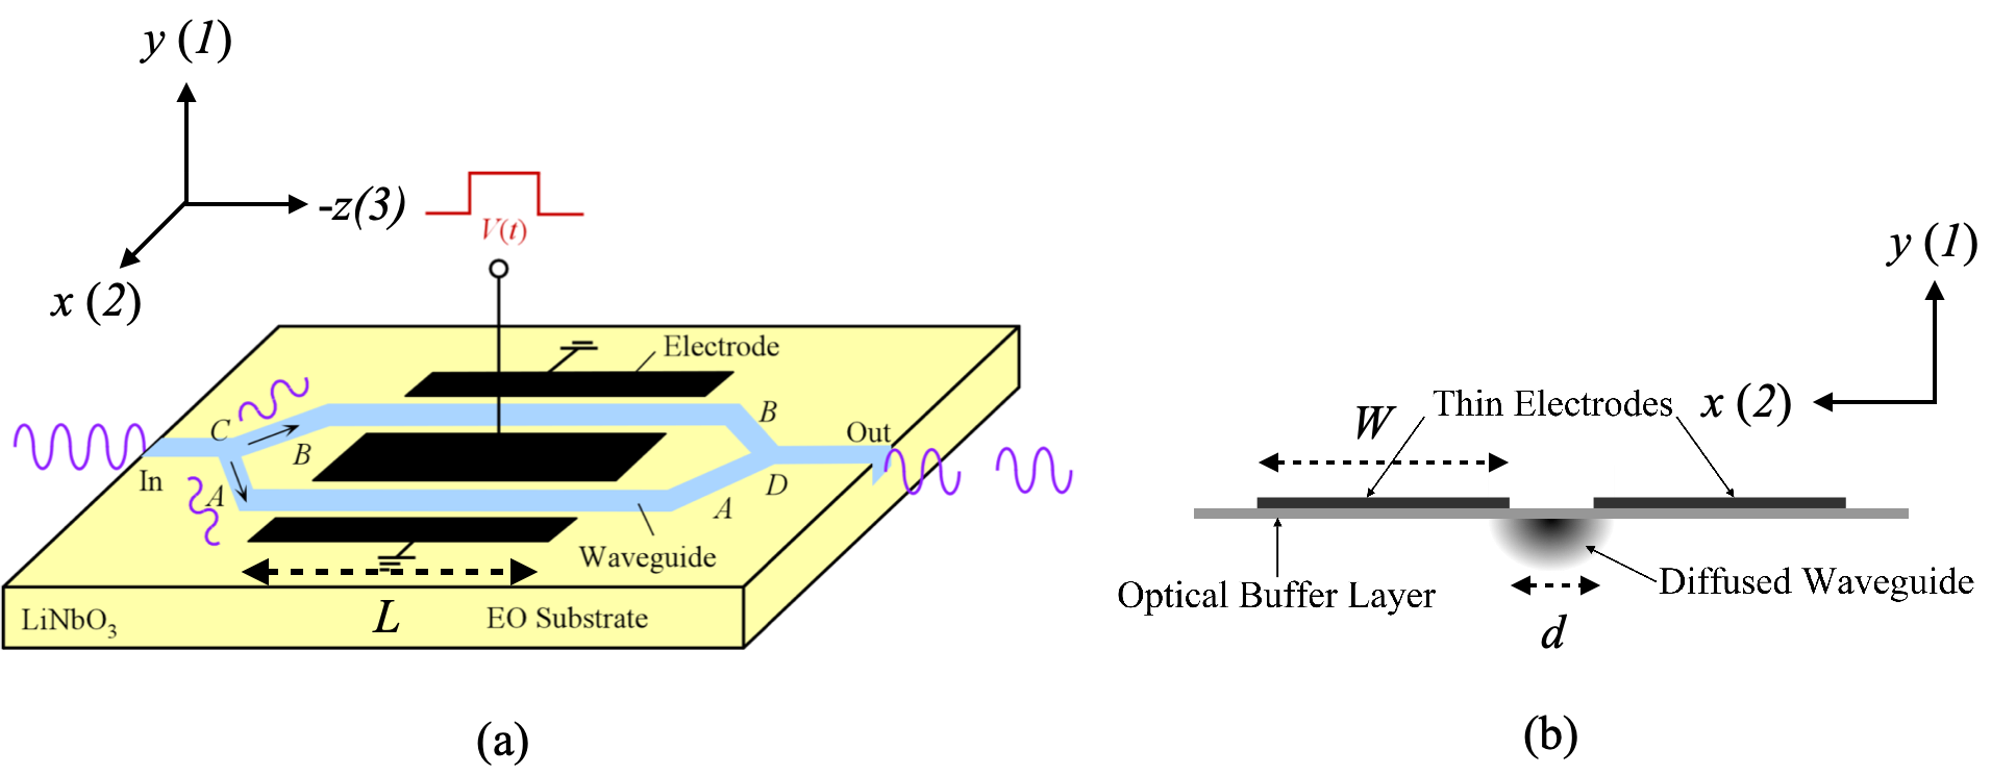


In [215]:
Γ_num1 = 0.6
d_num1 = 5e-6
W_num1 = 10e-6
L_num1 = 20e-3
n_z_num1 = 2.2
n_x_num1 = n_y_num1 = 2.286
r_22_num1 = 6.8e-12 #m/V
λ_0_num1 = 1550e-9

##### 1.A (5%) Calculer la valeur de $V_{\pi}$ pour obtenir un saut de phase de $\pi$ dans un des bras du modulateur.

Pour obtenir une interférence destructive à la sortie, les deux OEM doivent obtenir un retard de phase de $π$. La polarisation TE dans chaque branche possède un champ électrique qui ce propage selon 

$$
 E_{out}(z,t) = E_{in} e^{i(ωt - βL)} $$ 
où 

$$ β = k_0 n_{eff} = \frac{2π }{λ_0 }n  $$

Ici, nous avons la polarisation TE qui oscille perpendiculairement à la direction de propagation, donc parallèle à la surface du wafer dans la direction $\hat{x}$. Dans le cas de la modulation par effet pockel avec recouvremet $Γ$, l'indice de réfraction après application du champ électrique en direction $E_x$ deviens

$$ n_x' = n_x + \frac{1}{2}Γn_x^3r_{22}E_x $$

La différence de phase avant et après application du champ électrique dans une branche est alors

$$ Δϕ = β'L - βL = \frac{2πL}{λ_0 } (n' -n) = \frac{2πL}{λ_0 } \left(n_x + \frac{1}{2}Γn_x^3r_{22}E_x - n_x\right) =  \frac{πL  Γn_x^3r_{22} E_x }{λ_0 }$$

Ensuite, le champ électrique généré par les électrodes est invsersement proportielle à la distance qui les sépare. 
$$ Δϕ(V) = \frac{πL  Γn_x^3r_{22} }{λ_0 }\frac{V}{d} $$

C'est la différence de phase dans une branche, comme nous somme en configuration push-pull, notre MZI possède une différence de phase entre les deux branche de 
$$ Δϕ_{MZI}(V) = 2⋅Δϕ(V)= \frac{2πL  Γn_x^3r_{22} }{λ_0 }\frac{V}{d} $$

C'est dû au fait que la direction du champ électrique est inversé et que le cristall est anysotrope.

Pour avoir la valeur de $V_π$, on pose simplement $Δϕ = π$ ce qui nous donne.

In [216]:
def calculate_Δϕ(n, r_22, L, λ_0, V, d, Γ):
    """ Calcule le déphasage Δϕ en fonction de la tension appliquée V """
    Δϕ = (np.pi * L * Γ * n**3 * r_22 / λ_0) * (V / d)
    return Δϕ

def calculate_Δϕ_push_pull(n, r_22, L, λ_0, V, d, Γ):
    """ Calcule le déphasage Δϕ en fonction de la tension appliquée V """
    Δϕ = 2* calculate_Δφ(n, r_22, L, λ_0, V, d, Γ)
    return Δϕ

def calculate_V_π(n, r_22, L, λ_0, d, Γ):
    """ Calcule la tension V_π nécessaire pour un déphasage de π """
    V_pi = (λ_0 * d) / (2 * L * Γ * n**3 * r_22)
    return V_pi

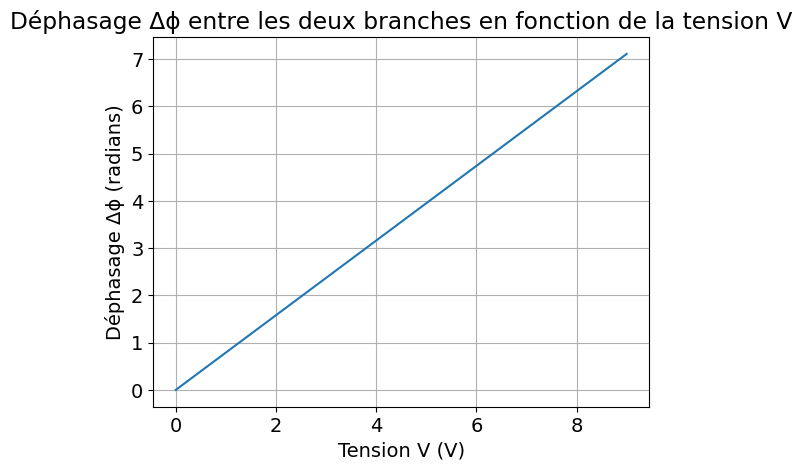

Tension V_π nécessaire pour un déphasage de π: 3.975 V


In [217]:
V_sweep = np.linspace(0, 9, 1000)  
Δϕ_values = calculate_Δϕ_push_pull(n_x_num1, r_22_num1, L_num1, λ_0_num1, V_sweep, d_num1, Γ_num1)

plt.plot(V_sweep, Δϕ_values)
plt.title("Déphasage Δϕ entre les deux branches en fonction de la tension V")
plt.xlabel("Tension V (V)")
plt.ylabel("Déphasage Δϕ (radians)")
plt.grid()
plt.show()




V_π_value = calculate_V_π(n_x_num1, r_22_num1, L_num1, λ_0_num1, d_num1, Γ_num1)
print(f"Tension V_π nécessaire pour un déphasage de π: {V_π_value:.3f} V")


##### 1.B (10%) Tracer la transmittance du modulateur en fonction de la tension appliquée $V$. Assumez des coupleurs parfaits (50-50). Identifiez la position de $V_{pi}$ calculée en (A) sur votre graphique. Quelle est la transmittance à $V_{pi}$?

Les deux champs déphasé de $Δϕ$ sont recombiner à sortie du MZI, ainsi il y interférence entre les deux OEM. En recombinant les deux ondes, l'intensité du champ életrique sera multiplier par le cossinus de la différence de phase entre les deux branches. Nous approximons une atténuation le long du MZI nul.

$$ P_{out} = P_{in} \cos^2(Δϕ/2) $$

On peut aussi écrire la différence de phase entre les deux branhces selon le ratio tension sur $V_π$.
$$ P_{out} = P_{in} \cos^2\left( \frac{πV}{2V_π} \right) $$

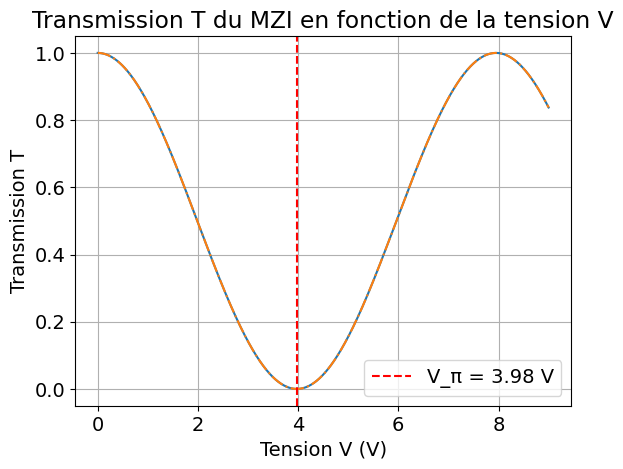

In [218]:
def calculate_transmission_MZI(Δϕ):
    """ Calcule la transmission T en fonction du déphasage Δϕ entre les deux branches """
    T = np.cos(Δϕ/2)**2
    return T

def calculate_transmission_MZI_V(V, V_π):
    """ Calcule la transmission T en fonction de la tension V appliquée """
    Δϕ = (np.pi * V) / (V_π)
    T = calculate_transmission_MZI(Δϕ)
    return T

T_values = calculate_transmission_MZI(Δϕ_values)
T_values_V = calculate_transmission_MZI_V(V_sweep, V_π_value)
plt.plot(V_sweep, T_values)
plt.plot(V_sweep, T_values_V, linestyle='-.')
plt.title("Transmission T du MZI en fonction de la tension V")
plt.axvline(x=V_π_value, color='r', linestyle='--', label=f'V_π = {V_π_value:.2f} V')
#plt.axvline(x=2*V_π_value, color='r', linestyle='--', label=f'2V_π = {2*V_π_value:.2f} V')
plt.legend()
plt.xlabel("Tension V (V)")
plt.ylabel("Transmission T")
plt.grid()
plt.show()

Dans notre cas parfait avec un spliting ratio 50:50, la transmitance à $V_π$ est 

In [219]:
print(f"Transmission T à V = 0: {calculate_transmission_MZI_V(0, V_π_value):.3f}")
print(f"Transmission T à V = V_π: {calculate_transmission_MZI_V(V_π_value, V_π_value)}")

Transmission T à V = 0: 1.000
Transmission T à V = V_π: 3.749399456654644e-33


In [220]:
def calculate_ER(T_max, T_min):
    """ Calcule le rapport d'extinction (ER) en décibels (dB) """
    ER = lin_to_dB(T_max / T_min)
    return ER

def calculate_ER_V(V_π):
    """ Calcule le rapport d'extinction (ER) en décibels (dB) en fonction de la tension V_π """
    T_max = calculate_transmission_MZI_V(0, V_π)
    T_min = calculate_transmission_MZI_V(V_π, V_π)
    ER = calculate_ER(T_max, T_min)
    return ER

print(f"Rapport d'extinction ER en dB: {calculate_ER_V(V_π_value):.2f} dB")

print(f"Cette valeur tend vers l'infini car T_min = 0 lorsque V = V_π. Avec les erreurs numériques, on obtient une valeur très élevée.")

Rapport d'extinction ER en dB: 324.26 dB
Cette valeur tend vers l'infini car T_min = 0 lorsque V = V_π. Avec les erreurs numériques, on obtient une valeur très élevée.


##### 1.C (5%) Vous utilisez un signal électrique avec un composante DC $V_{DC} = 3$ V et une composante AC peak-to-peak $V_{AC,pp} = 1$ V. Quel est le ratio d'extinction $ER$?

In [221]:

V_1 = 3-0.5
V_2 = 3+0.5

T_1 = calculate_transmission_MZI_V(V_1, V_π_value)
T_2 = calculate_transmission_MZI_V(V_2, V_π_value)

T_min_C = min(T_1, T_2)
T_max_C = max(T_1, T_2)

ER_C = calculate_ER(T_max_C, T_min_C)

print(f"Transmission T_1 à V = {V_1} V: {T_1:.3f}")
print(f"Transmission T_2 à V = {V_2} V: {T_2:.3f}")
print(f"Rapport d'extinction ER en dB : {ER_C:.2f} dB")

Transmission T_1 à V = 2.5 V: 0.303
Transmission T_2 à V = 3.5 V: 0.035
Rapport d'extinction ER en dB : 9.39 dB


Faissons une fonction

In [222]:
def plot_transmission_vs_V_ER(V_DC, V_AC, V_π):
    V_1 = V_DC - V_AC / 2
    V_2 = V_DC + V_AC / 2

    T_1 = calculate_transmission_MZI_V(V_1, V_π)
    T_2 = calculate_transmission_MZI_V(V_2, V_π)

    T_min = min(T_1, T_2)
    T_max = max(T_1, T_2)

    ER_C = calculate_ER(T_max, T_min)

    print(f"Transmission T_1 à V = {V_1:.4f} V: {T_1:.3f}")
    print(f"Transmission T_2 à V = {V_2:.4f} V: {T_2:.3f}")
    print(f"Rapport d'extinction ER en dB : {ER_C:.2f} dB")


    V_sweep_V1_V_2 = np.linspace(V_1, V_2, 1000)
    T_sweep_V1_V_2 = calculate_transmission_MZI_V(V_sweep_V1_V_2, V_π)

    plt.plot(V_sweep_V1_V_2, T_sweep_V1_V_2)
    plt.plot(V_sweep, T_values, linestyle='--', alpha=0.3)    
    plt.title(f"Transmission T du MZI entre V = {V_1:.2f} V et V = {V_2:.2f} V")
    plt.xlabel("Tension V (V)")
    plt.ylabel("Transmission T")
    plt.grid()
    plt.show()

Transmission T_1 à V = 2.5000 V: 0.303
Transmission T_2 à V = 3.5000 V: 0.035
Rapport d'extinction ER en dB : 9.39 dB


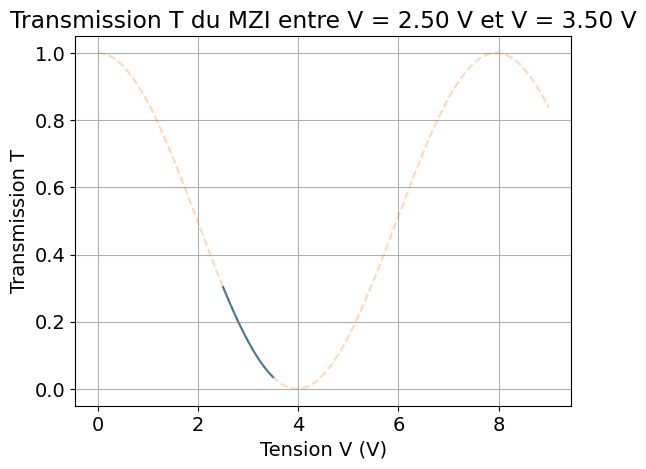

In [223]:
plot_transmission_vs_V_ER(3, 1, V_π_value)

##### 1.D (5%) Trouver une combinaison $V_{DC}$ et $V_{AC}$ vous permettant de maximiser le ratio d'extincition. Quel est le ratio d'extinction à ce moment? Qu'est-ce qui limite $ER$?


Dans le cas où le spliting est parfaitement 50:50, la valeur théorique maximal pour l'extiction ratio est infini. C'est en prenant en compte que le coefficient de transmission à $V_π$ serait scrictement nul, ce qui est loins d'être réalisable au laboratoire. Il faut aussi que les deux tension soit exactement $V_1 = nV_π$ et $V_2 = (n±1)V_π$. Dans notre cas, il faut que le Biais voit à $V_π/2$ et notre $V_{AC,pp} = V_π$.



Transmission T_1 à V = 0.0000 V: 1.000
Transmission T_2 à V = 3.9751 V: 0.000
Rapport d'extinction ER en dB : 324.26 dB


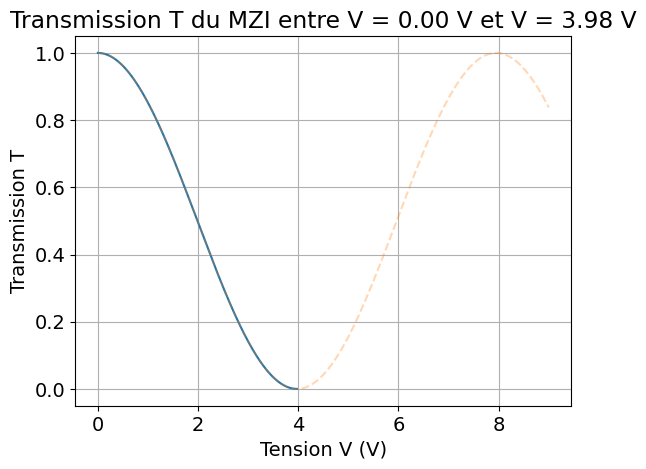

In [224]:
V_DC = V_π_value / 2
V_AC = V_π_value

plot_transmission_vs_V_ER(V_DC, V_AC, V_π_value)

##### 1.E (5%) Quelle tension $V_{DC}$ devez-vous appliquez afin d'opérer autour de la plage linéaire du modulateur?

Ici aussi, pour resté dans la section linéaire de la plage d'opérations, on veut mettre un Biais à $V_π/2$. Ensuite, la valeur AC dépend du ratio de linéairité souhaité, un bon départ serait $V_{ac} = 50\%⋅ V_π$

In [225]:
from IPython.display import clear_output

@interact(V_AC_factor=(0.0, 1.0, 0.01))
def interactive_plot(V_AC_factor=0.5):
    clear_output(wait=True)
    V_DC = V_π_value/2
    V_AC = V_π_value*V_AC_factor
    plot_transmission_vs_V_ER(V_DC, V_AC, V_π_value)

interactive(children=(FloatSlider(value=0.5, description='V_AC_factor', max=1.0, step=0.01), Output()), _dom_c…

##### 1.F (5%) Quel serait l'effet d'utiliser le modulateur en polarisation TM? Cela serait-il problématique pour son opération? Justifier avec un calcul.

La polarisation TM, oscille dans la direction $\hat{y}$ et ce mode voit l'indice de réfraction $n_y$. Notre modulateur utilise le ($LiNbO _3$) pour moduler l'indice de réfraction $n_y$ selon 
$ \Delta n_y = -\frac{1}{2}n_y^3 r_{22} E_x$. Ainsi notre champ électrique dans les deux branches est similaire à la polarisation TE, mais le signe moins, viens réduire l'indice de réfraction et non l'augmenté. On observe ainsi une dinymmique différente où la vittesse de propagation dans la branche du haut (B) est ralentie et celle du bas (A) est acccéléré.

$$ n_y' = n_y - \frac{1}{2}Γn_y^3r_{22}E_x $$

La différence de phase avant et après application du champ électrique est alors

$$ Δϕ = β'L - βL = \frac{2πL}{λ_0 } (n' -n) = \frac{2πL}{λ_0 } \left(n_y - \frac{1}{2}Γn_y^3r_{22}E_x - n_-\right) =  \frac{-πL  Γn_x^3r_{22} E_x }{λ_0 }$$

On remarque que la différence entre la polarisation TE et TM est simplement le signe de la  différence de phase entre les deux branches. La différence de phase entre les deux branches sera le double et de signe négatif par raport à TE. À la recombinaison, l'intensité et la puissance vont suivre la même dynamique.

Tension V_π du modulateur TM: 3.975 V


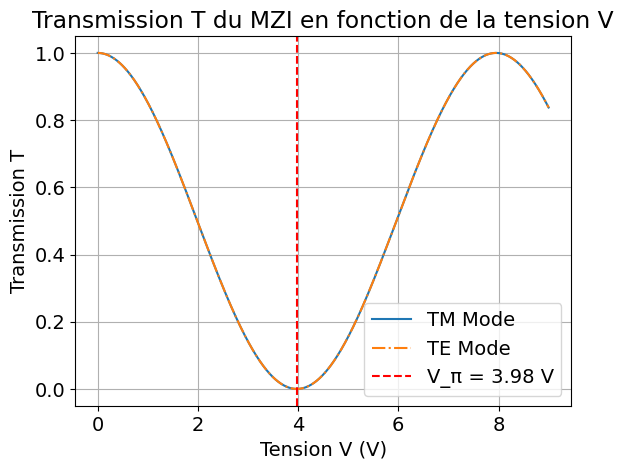

In [226]:
Δϕ_TM_1_arm = -calculate_Δϕ(n_y_num1, r_22_num1, L_num1, λ_0_num1, V_sweep, d_num1, Γ_num1)

T_TM = calculate_transmission_MZI(2*Δϕ_TM_1_arm)

V_π_TM = calculate_V_π(n_y_num1, r_22_num1, L_num1, λ_0_num1, d_num1, Γ_num1)
print(f"Tension V_π du modulateur TM: {V_π_TM:.3f} V")

plt.plot(V_sweep, T_TM, label='TM Mode')
plt.plot(V_sweep, T_values, linestyle='-.', label='TE Mode')
plt.title("Transmission T du MZI en fonction de la tension V")
plt.axvline(x=V_π_TM, color='r', linestyle='--', label=f'V_π = {V_π_value:.2f} V')
plt.legend()
plt.xlabel("Tension V (V)")
plt.ylabel("Transmission T")
plt.grid()
plt.show()

##### 1.G (5%) Expliquez qualitativement et dans vos mots quel serait l'effet d'utiliser un coupleur imparfait pour le Mach-Zehnder? C'est à dire que la répartition de la puissance entre le bras $A$ et le bras $B$ ne serait plus 50-50.

Pour qu'à la recombinaison, il y aucune lumière, l'interférence destructive a besoin d'une différence de phase de $π$ mais aussi de deux ondes de même amplitudes. Si dans notre cas le splitting ratio n'est pas de $50:50$, mais plustôt de $α:1-α$. On obtiens à la sortie, la recombinaison de deux champ d'amplitude 
$$ E_A = \sqrt{α}E_{in} \quad\Bigg|\quad E_B = \sqrt{1-α}E_{in}  $$
La recombinnaison après propagation dans les deux bras (assumant un coefficient du coupleur de recombinaison parfait) est le suivant. 

$$ E_{out} = \frac{E_{in}}{\sqrt{2}} [\sqrt{α} e^{iϕ_A} + \sqrt{1-α}e^{iϕ_B} ] $$
Ce qui donne une puissance à la sortie

$$ P_{out} = E_{out}^2 = \frac{P_{in}}{2}[1+2\sqrt{α(1-α)}\cos(Δϕ)]
$$ 

Pour vérifier, si l'on applique $α=50\%$ comme précédament, on retrouve
$$ T  = \frac{P_{out}}{P_{in}} = \frac{1}{2}[1+2\sqrt{0.5(1-0.5)}\cos(Δϕ)] = \frac{2}{2}\cos^2{Δϕ/2}  = \cos^2{\left( \frac{Δϕ}{2} \right)}
$$ 

On remarque que le $V_π$ n'est pas affecté, mais que $T_{min}$ et $T_{max}$ donc l'$ER$ seront différent. 

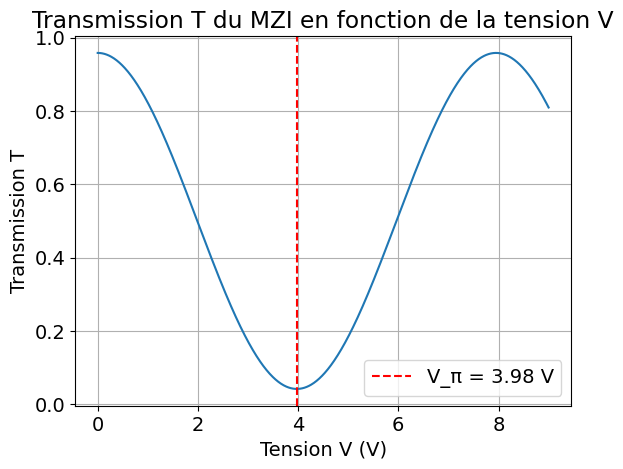

In [227]:
def calculate_transmission_MZI_splitting_ratio(Δϕ, α):
    """ Calcule la transmission T en fonction du déphasage Δϕ entre les deux branches et du ratio de division α """
    T = 0.5 * (1 + 2 * np.sqrt(α * (1 - α)) * np.cos(Δϕ))
    return T

α_num1 = 0.3
T_values_α = calculate_transmission_MZI_splitting_ratio(Δϕ_values, α_num1)

plt.plot(V_sweep, T_values_α)
plt.title("Transmission T du MZI en fonction de la tension V")
plt.axvline(x=V_π_value, color='r', linestyle='--', label=f'V_π = {V_π_value:.2f} V')

plt.legend()
plt.xlabel("Tension V (V)")
plt.ylabel("Transmission T")
plt.grid()
plt.show()

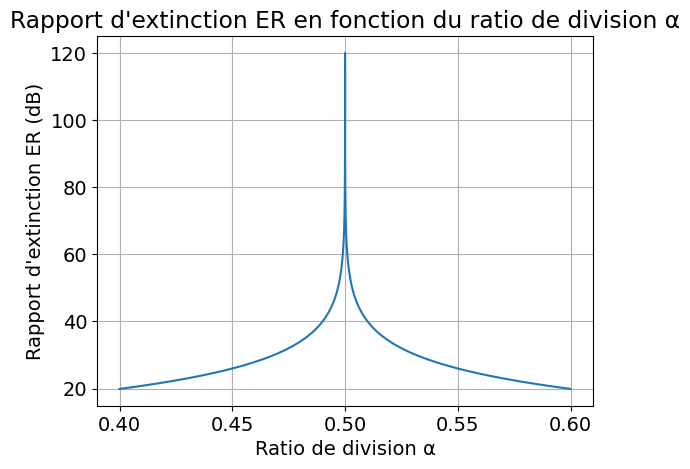

L'ER pour α=0.5 tend vers l'infini car T_min = 0. Et est limité par la précision numérique.


In [228]:
α_sweep = np.linspace(0.4, 0.6, 100000)
T_α_sweep_min = calculate_transmission_MZI_splitting_ratio(np.pi, α_sweep)
T_α_sweep_max = calculate_transmission_MZI_splitting_ratio(0, α_sweep)

# calculate ER as a function of α
ER_α = lin_to_dB(T_α_sweep_max / T_α_sweep_min)
plt.plot(α_sweep, ER_α)
plt.title("Rapport d'extinction ER en fonction du ratio de division α")
plt.xlabel("Ratio de division α")
plt.ylabel("Rapport d'extinction ER (dB)")
plt.grid()
plt.show()

print(f"L'ER pour α=0.5 tend vers l'infini car T_min = 0. Et est limité par la précision numérique.")

### Question 2 - Photodétecteur (60%)

In [229]:
reset_globals_variables()
### données problèmes 2
# Laser
I_th_num2 = 10e-3  # A
η_slope_num2 = 0.3e-3  # W/A
τ_p_num2 = 10e-12  # s
τ_m_num2 = 10e-12  # s
V_p_num2 = 1e-16  # m^3
B_num2 = 1.5e-20  # m^-1
n_g_laser_num2 = 4
λ_0_num2 = 900e-9  # m

# fibre
α_fibre_num2 = 0.2  # dB/km


# photodétecteur
surface_pin_num2_mm = 1e-6  # m^2
I_d_num2 = 2e-9  # A
r_num2 = 0.1e-3  # m
D_e_num2 = 3e-4  # m^2/s
l_p_num2 = 1e-6  # m
W_i_num2 = 20e-6  # m
V_r_num2 = 60  # V
η_i_num2 = 0.95
α_i_num2 = 3e4  # m^-1
α_p_num2 = 10 * α_i_num2  # m^-1
n_pin_num2 = 3.5
v_d_e_num2 = 5e4  # m/s
v_d_h_num2 = 5e4  # m/s
R_L_num2 = 50  # Ohm


Considérez le système de transmission présenté à la figure ci-bas en (a). Vous disposez d'une longueur fibre illimitée avec des pertes de propagation de  $\alpha_{fibre}$ = 1 dB/km. Le faisceau incident sur le photodétecteur (en sortie de la fibre) à une aire de 1 mm $^2$ . Le photodétecteur $ pin $ est montré en détail sur la figure ci-bas en (b). Il n'y a pas de recouvrement anti-reflet à l'entrée. Approximez que tous les électrons générés dans la zone $ p $ atteignent la zone intrinsèque. Vous devez considérer l'absorption dans la zone $ p $ dans votre analyse. Tout les photoélecrons atteignant la zone $n$ participent au photocourant. Votre système est opéré à $T = 300$ K.

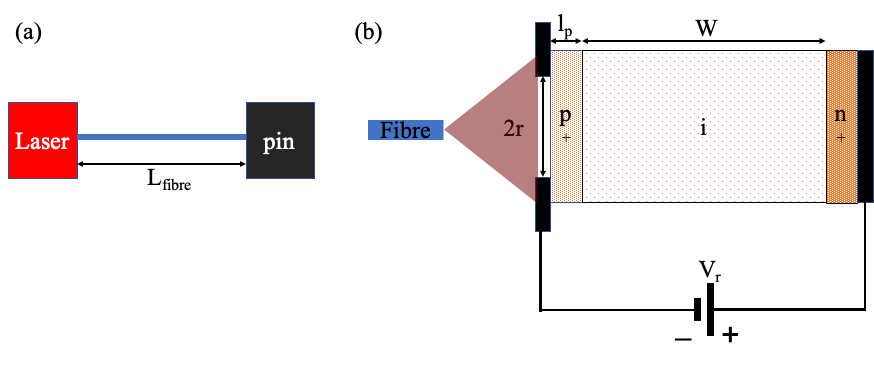

**Les paramètres de la diode laser sont:**

- Courant de seuil: $I_{th} = 10$ mA
- Efficacité de pente: $\eta_{slope} = \frac{dP}{dI} = 0.3$ mW/mA
- Temps de vie des photons: $\tau_p = 10$ ps
- Temps de vie du au couplage (miroirs): $\tau_m = 10$ ps
- Volume du mode optique: $V_p = 1 \times 10^{-16}$ m $^3$
- Gain différentiel: $B = 1.5 \times 10^{-20}$ $m^{-1}$
- Indice de groupe: $n_g = 4$
- Longueur d'onde d'émission: $\lambda_0 = 900$ nm

**Les paramètres du photodétecteur sont:**

- Courant d'obscurité: $I_d = 2$ nA
- Rayon de l'ouverture à l'entrée du $pin$: $r = 0.1$ mm
- Coefficient de diffusion des électrons dans la zone $p$: $D_e = 3 \times 10^{-4}$ m $^2/$ s
- Longueur de la zone $p$ : $l_p = 1~\mu$ m
- Longueur de la zone intrinsèque: $W_i = 20~\mu$ m
- Tension d'opération en polarisation inverse: $V_r = 60$ V
- Efficacité quantique interne: $\eta_i = 0.95$
- Coefficient d'absorption dans la zone intrinsèque: $\alpha_i = 3 \times 10^4$ m $^{-1}$
- Coefficient d'absorption dans la zone $p$: $\alpha_p = 10 \times \alpha_i$
- Indice de réfraction: $n = 3.5$
- Vitesse de dérive des porteurs: $v_{d,e} = v_{d,h} = 5 \times 10^4$ m/s
- Résistance de charge: $R_L = 50~\Omega$

Dans l'image du montage, la fibres n'est pas collé directement sur la pin, il y a un interface fibre→air,  de la dispersion, air→pin. Je supose la même chose pour le laser, il y a une courte distance pour le  Il y a un coefficient de réfelxion à chaque interface, et je vais assumer que les effet de cavité sont négligable et ne vais pas considérer la 2ieme réflexion. Il  faudrait aussi considéré l'effet de l'angle d'incidence entre l'air et la pin, pour des raison de simplicité, je vais approximé que tout les rayons arrive à incidence normal. Le coefficient de transmission à chaque interface entre un millieu 1 et milieu 2 est alors
$$ T_{1→2} = \frac{(2n_1)^2}{(n_1 + n_2)^2} $$

Je vais aussi assumé que l'indice de réfraction de la fibres est d'environ 1.45, cette valeur peut être varier si différents design de fibre sont utilisé. Je supose aussi que le milieu entre la fibre et la pin (l'interstice) est de l'air d'indice $n_{interstice} = 1$.

In [230]:
n_fiber_num2 = 1.45
n_interstice_num2 = 1

Le facteur de confinement est définie selon le ratio du volume active du laser et le volume du mode optique (Silicon Photonics Design
Lukas Chrostowski, page 298)
$$ Γ = \frac{V_{active}}{V_{mode}} $$

Il est mentionner que le faisceau laser dans l'air possède une surface de $1 \rm{\ mm}^2$ ("sur le photodétecteur"), nous avons probablement un fibre de silice monomode (standard pour des pertes de 1 dB/km), le profil d'intensité de la lumière est probablement gaussien (approximation). Il n'existe pas de concepte comme surface de mode (aire du faisceau), je vais assumé que le correcteur veut dire mode field diameter MFD. C'est le diamètre du mode où la puissance par rapport au maximum est de $1/e^2$.
https://en.wikipedia.org/wiki/Mode_field_diameter

Ainsi, une surface de $ 1×10^{-6} \ \rm{m^2} $ donne un MFD de 
$$ Aire = \frac{π D^2}{4} = \frac{π MFD^2}{4} 
$$  
$$ MFD = \sqrt{\frac{4⋅Aire}{π}} =  \sqrt{\frac{4⋅1×10^-6}{π}} = 1.12 \rm{\ mm}
 $$

Maintenant que nous connaisson le $MFD = 2w_0$ d'une gaussienne, on peut calculer la puissance qui passera à travers le trou de rayon $r=0.1 \rm{\ mm}$ avec une intrégral d'overlap. On viens intégrer la densité de puissance de notre gaussienne seulement entre 0 et $r$.

Pour un faisceau gaussien avec profil d'intensité 
$$I(ρ) = I_0 \exp(-2r^2/w_0^2)$$

La puissance totale de ce faisceau est 
$$P_{total} = 2π I_0 \int_0^{∞} \exp\left(-\frac{2ρ^2}{w_0^2}\right) ρ \, dρ = \frac{π I_0 w_0^2}{2}$$

et la puissance transmise à travaer un cercle de rayon $r$ est alors:
$$P_{transmise} = 2\pi I_0 \int_0^{r} \exp\left(-\frac{2\rho^2}{w_0^2}\right) \rho \, d\rho = \frac{\pi I_0 w_0^2}{2} \left(1 - e^{-2r^2/w_0^2}\right)$$

Et pour finir le coefficient de transmission est simplement
$$T = \frac{P_{transmise}}{P_{total}} = 1 - \exp\left(-\frac{2r^2}{w_0^2}\right)$$

In [231]:
def calculate_optical_transmission(n_1, n_2):
    """ Calcule la transmission optique T entre deux milieux d'indices n_1 et n_2 """
    T = (4 *  n_1*n_2) / (n_1 + n_2)**2
    return T

def calculate_loss_fiber(α, L):
    """ Calcule la perte optique en fonction du coefficient d'absorption α [dB/km] et de la longueur L [km] """
    Loss_dB = α*L
    Loss_lin = dB_to_lin(-Loss_dB)
    return Loss_lin

def calculate_transmission_hole_gaussian(r, w_0):
    """ 
    Calcule la fraction de puissance d'un faisceau gaussien qui passe à travers une ouverture circulaire.
    """
    T = 1 - np.exp(-2 * r**2 / w_0**2)
    return T

##### 2.A (20%) Quelle est la longueur maximale de fibre que vous pouvez utiliser sans avoir besoin d'amplification si le laser émet 10 mW de puissance, tout en gardant un ratio signal-sur-bruit ($SNR$) supérieur ou égal à 10?

** Suggestion: écrire une fonction qui  calcule le photocourant généré en fonction de la puissance incidente sur le photodétecteur **

Ensuite pour avoir l'efficacité d'absorbtion de la diode, on doit prendre en compte la fraction de photons qui sont absorbé dans la zone active, c'est à dire *p* et  *i*. La fraction de photon qui passeronts à travers c'est deux zones sans être absorbé seront perdu. Ainsi, l'efficacité d'absorbtion est 
$$ η_{abs} = 1 - e^{-α_p l_p - α_iW_i}$$

On doit calculer le courant généré par une certaine puissanec qui pénètre dans la PIN. L'efficacité quantique interne $η_i$ nous donne le nombre d'électron généré par photon absorbé dans la cavité. Ainsi pour avoir le courant $I_{ph}$ généré par une puissance optiques à l'intérieur de la cavité $P_{abs} = η_{abs}P_{int}$, on doit utilisé la formule suivante.

$$  η_i = \frac{I_{ph}/e}{P_{abs}/hν} = \frac{I_{ph}hc}{eP_{abs}λ}  $$
$$ I_{ph} = \frac{η_i e P_{abs} λ}{hc} = \frac{η_i e η_{abs}P_{int} λ}{hc} \ [\rm{A}] $$



In [232]:
def calculate_photocurrent(P_in, η_i, η_abs,  λ_0):
    """ Calcule le courant photocourant I_ph en fonction de la puissance incidente P_in, de l'efficacité quantique η_i et de la longueur d'onde λ_0 """
    h = cte.h
    c = cte.c
    q = cte.e
    I_ph = (η_i * q * η_abs * P_in) / (h * c / λ_0)
    return I_ph

In [233]:
def calculate_η_abs(α_p, l_p, α_i, W_i):
    """ Calcule l'efficacité d'absorption η_abs en fonction des coefficients d'absorption et des dimensions de la région de détection """
    η_abs = 1 - np.exp(-α_p * l_p - α_i * W_i)
    return η_abs

η_abs_num2 = calculate_η_abs(α_p_num2, l_p_num2, α_i_num2, W_i_num2)
print(f"Efficacité d'absorption η_abs: {η_abs_num2:.3f}")

Efficacité d'absorption η_abs: 0.593


Les pertes le long de la communication sont calculer avec le coefficient de Transmission à chaque étape.

In [234]:
MFD =  np.sqrt(4 * surface_pin_num2_mm / np.pi)  # rayon du faisceau gaussien
w_0 = MFD / 2

print(f"w_0 = {w_0*1000:.3f} mm")

T_hole = calculate_transmission_hole_gaussian(r_num2, w_0)
T_hole_dB = lin_to_dB(T_hole)

print(f"Transmission power through the hole: {T_hole*100:.3f} % = {T_hole_dB:.3f} dB")


T_interface_fiber_air = calculate_optical_transmission(n_fiber_num2, n_interstice_num2)
T_interface_fiber_air_dB = lin_to_dB(T_interface_fiber_air)
print(f"Transmission at fiber/air interface: {T_interface_fiber_air*100:.3f} % = {T_interface_fiber_air_dB:.3f} dB")

T_interface_air_pin = calculate_optical_transmission(n_interstice_num2, n_pin_num2)
T_interface_air_pin_dB = lin_to_dB(T_interface_air_pin)
print(f"Transmission at air/pin interface: {T_interface_air_pin*100:.3f} % = {T_interface_air_pin_dB:.3f} dB")

w_0 = 0.564 mm
Transmission power through the hole: 6.090 % = -12.154 dB
Transmission at fiber/air interface: 96.626 % = -0.149 dB
Transmission at air/pin interface: 69.136 % = -1.603 dB


J'assume ici que le couplage entre le laser et la fibre est parfait. Il faudrait avoir plus d'information pour pouvoir calculer ce ratio. 


Perte de puissance optique dans la fibre pour 10 km: -12.727 dB
Perte totale de puissance optique pour 10 km de fibre: -26.633 dB


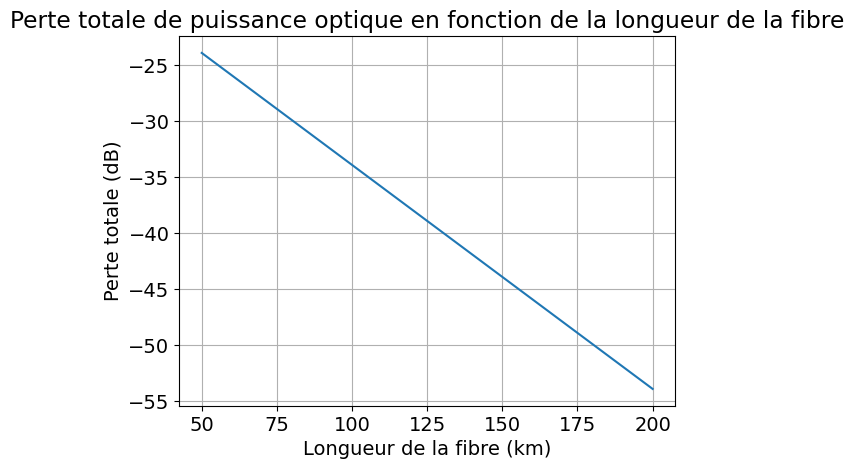

In [235]:
Lengh_fibre_num2_km = np.linspace(50, 200, 100)  # km

Loss_fibre_num2 = calculate_loss_fiber(α_fibre_num2, Lengh_fibre_num2_km)
print(f"Perte de puissance optique dans la fibre pour 10 km: {lin_to_dB(Loss_fibre_num2[9]):.3f} dB")

Total_power_loss = T_interface_fiber_air * Loss_fibre_num2 * T_interface_air_pin * T_hole

print(f"Perte totale de puissance optique pour 10 km de fibre: {lin_to_dB(Total_power_loss[9]):.3f} dB")
plt.plot(Lengh_fibre_num2_km, lin_to_dB(Total_power_loss))
plt.title("Perte totale de puissance optique en fonction de la longueur de la fibre")
plt.xlabel("Longueur de la fibre (km)")
plt.ylabel("Perte totale (dB)")
plt.grid()
plt.show()



pour toutes les longueurs de fibre, on calcul ainsi la puissance à l'intérieur de la cavité sachant que la puissance émise est de $10 \rm{\ mW}$.

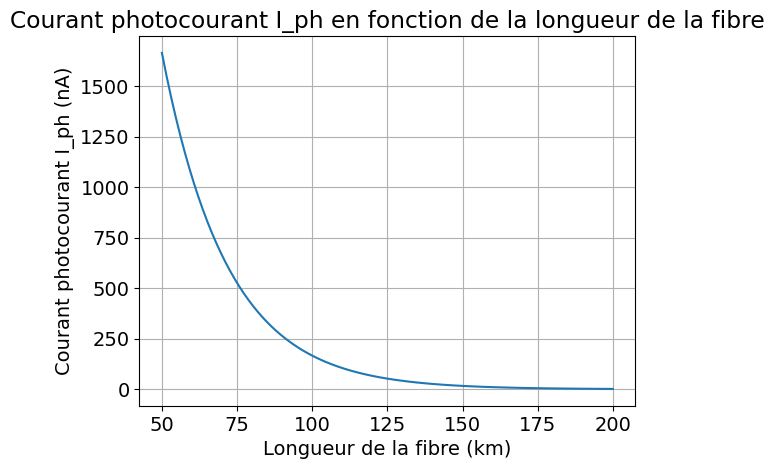

In [245]:
# Calcul de I_ph pour une puissance incidente de 1 mW
P_laser_num2 = 1e-3  # W

P_into_pin_num2 = P_laser_num2 * Total_power_loss

photocurrent_num2 = calculate_photocurrent(P_into_pin_num2, η_i_num2, η_abs_num2, λ_0_num2)
plt.plot(Lengh_fibre_num2_km, photocurrent_num2 * 1e9)
plt.title("Courant photocourant I_ph en fonction de la longueur de la fibre")
plt.xlabel("Longueur de la fibre (km)")
plt.ylabel("Courant photocourant I_ph (nA)")
plt.grid()
plt.show()

Finalement pour calculer le SNR, nous utilison la formule du livre qui

##### 2.B (5%) Quelle est la responsivité du photodétecteur? Quelle est la puissance équivalente au bruit $NEP$?

In [237]:
# - Réponse -

##### 2.C (5%) Proposez deux façons de modifier votre système afin d'augmenter le $SNR$. Justifiez avec des calculs.

In [238]:
# - Réponse -

##### 2.D (5%) Considérez une modulation directe petit signal du laser de votre système, vous conservez tout mais êtes libre de choisir le courant injecté au laser. Quel courant DC appliquez-vous afin d'obtenir un $SNR \ge 10$?

In [239]:
# - Réponse -

##### 2.E (5%) Encore en modulation directe du laser, quelle est la profondeur de modulation maximale si vous devez être en mesure de différencier l'état "0" au récepteur du bruit d'obscurité?

In [240]:
# - Réponse -

##### 2.F (5%) Proposez une façon d'augmenter la vitesse de modulation directe du laser tout en conservant les conditions de modulations énoncées en (D) et en (E). Justfiez avec un calcul.

In [241]:
# - Réponse -

##### 2.G (5%) Pour les conditions trouvées en (D) et (E), quel est le photocourant généré par le photodétecteur à l'état "1"?

In [242]:
# - Réponse -

##### 2.H (5%)Calculer la fréquence de résonance de la diode laser en modulation petit signal.

In [243]:
# - Réponse -

##### 2.I (5%) Identifiez l'élément limitant la vitesse d'opération de votre système. Justifiez avec un calcul.

In [244]:
# - Réponse -